In [1]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [2]:
from catalog_query import get_VVV_catalog
import cutout_manager

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import regions
from regions import Regions

from jwst_plots import JWSTCatalog
from jwst_plots import make_cat_use
#from isochrone_plots import Isochrone

In [3]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [4]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [5]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))

# JWST

In [6]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
#'~/research/Research/JWST/cloudc/'
# #

In [7]:
cat_use = make_cat_use()

In [95]:
cat = cat_use
ref_band1 = 'f182m'
ref_band2 = 'f212n'
color_cut = 0.5
mask = (cat.color(ref_band1, ref_band2) > color_cut) | (np.isnan(np.array(cat.band(ref_band1))) & ~np.isnan(np.array(cat.band(ref_band2))))
cat_red = JWSTCatalog(cat.catalog[mask])

cat_blue = JWSTCatalog(cat.catalog[~mask])

(0.0, 2.0)

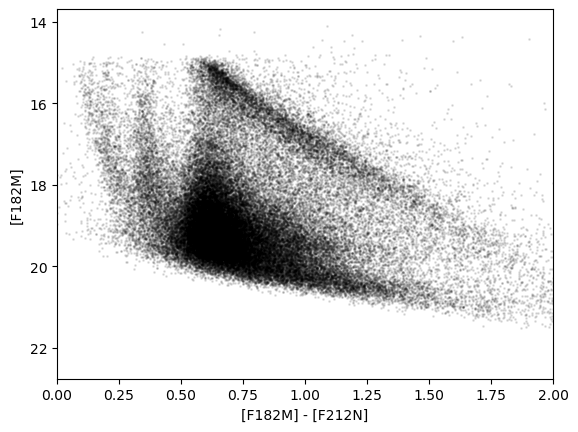

In [70]:
ax = plt.subplot(111)
cat_use.plot_CMD('f182m', 'f212n', 'f182m', color='k', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 2)

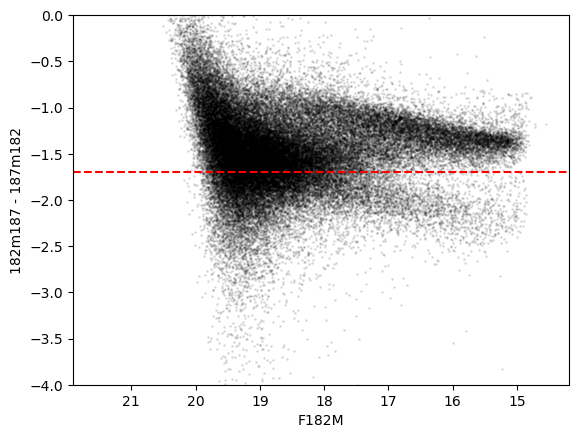

In [73]:
#cat_use.plot_CMD('182m187', '187m182', 'f182m', color='k', s=1, alpha=0.1)
plt.scatter(cat_use.band('f182m'), cat_use.color('182m187', '187m182'), s=1, alpha=0.1, color='k')
#plt.scatter(cat_red.band('f182m'), cat_red.color('182m187', '187m182'), s=1, alpha=0.5, color='r')
plt.xlabel('F182M')
plt.ylabel('182m187 - 187m182')
plt.gca().invert_xaxis()
plt.ylim(-4, 0)
plt.axhline(-1.7, color='r', ls='--')

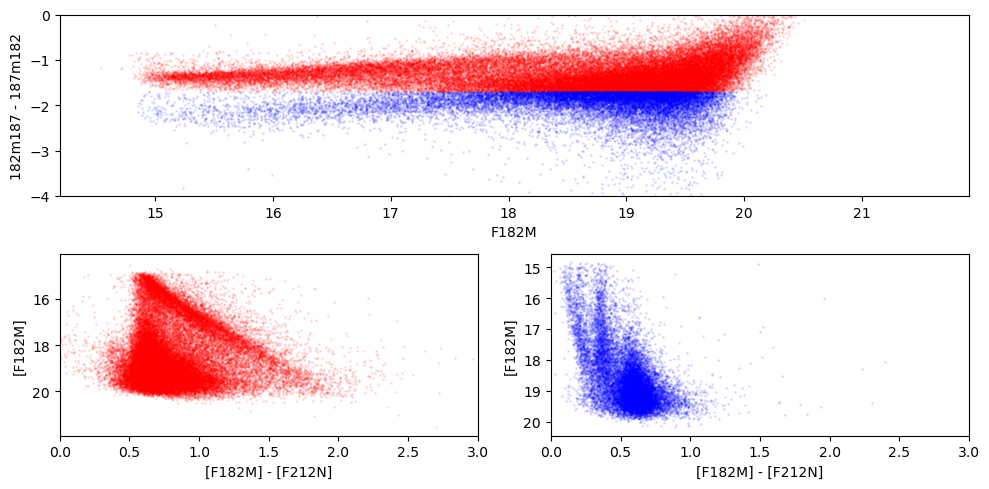

In [106]:
fig = plt.figure(figsize=(10, 5))
cat_above_18 = JWSTCatalog(cat_use.catalog[cat_use.color('182m187', '187m182') > -1.7])
cat_below_18 = JWSTCatalog(cat_use.catalog[cat_use.color('182m187', '187m182') < -1.7])

ax = plt.subplot(211)
ax.scatter(cat_above_18.band('f182m'), cat_above_18.color('182m187', '187m182'), s=1, alpha=0.1, color='r')
ax.scatter(cat_below_18.band('f182m'), cat_below_18.color('182m187', '187m182'), s=1, alpha=0.1, color='b')
ax.set_ylim(-4, 0)
ax.set_xlabel('F182M')
ax.set_ylabel('182m187 - 187m182')

ax=plt.subplot(223)
cat_above_18.plot_CMD('f182m', 'f212n', 'f182m', color='r', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)
ax = plt.subplot(224)
cat_below_18.plot_CMD('f182m', 'f212n', 'f182m', color='b', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

plt.tight_layout()

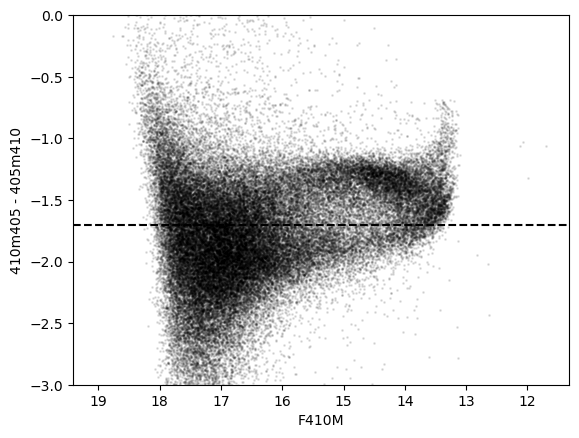

In [43]:
#cat_use.plot_CMD('182m187', '187m182', 'f182m', color='k', s=1, alpha=0.1)
plt.scatter(cat_use.band('f410m'), cat_use.color('410m405', '405m410'), s=1, alpha=0.1, color='k')
#plt.scatter(cat_red.band('f410m'), cat_red.color('410m405', '405m410'), s=1, alpha=0.5, color='r')
plt.xlabel('F410M')
plt.ylabel('410m405 - 405m410')
plt.gca().invert_xaxis()
plt.ylim(-3, 0)
plt.axhline(-1.7, color='k', ls='--')

(0.0, 3.0)

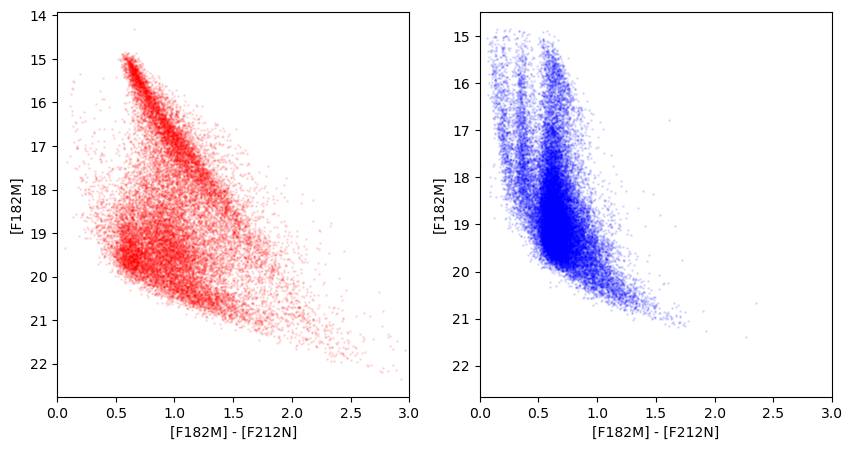

In [69]:
fig = plt.figure(figsize=(10, 5))
cat_above = JWSTCatalog(cat_use.catalog[cat_use.color('410m405', '405m410') > -1.7])
cat_below = JWSTCatalog(cat_use.catalog[cat_use.color('410m405', '405m410') < -1.7])

ax=plt.subplot(121)
cat_above.plot_CMD('f182m', 'f212n', 'f182m', color='r', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)
ax = plt.subplot(122)
cat_below.plot_CMD('f182m', 'f212n', 'f182m', color='b', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

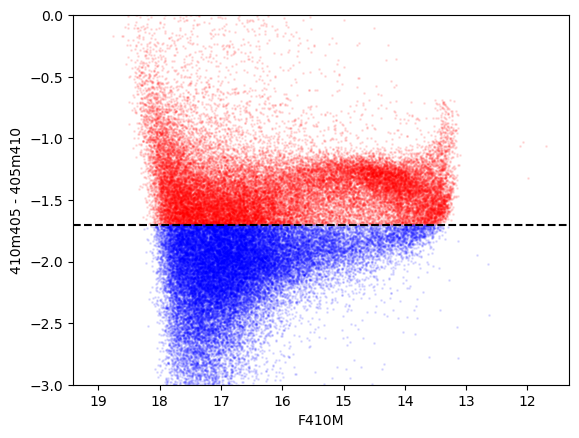

In [65]:
#cat_use.plot_CMD('182m187', '187m182', 'f182m', color='k', s=1, alpha=0.1)
#plt.scatter(cat_use.band('f410m'), cat_use.color('410m405', '405m410'), s=1, alpha=0.1, color='k')
#plt.scatter(cat_red.band('f410m'), cat_red.color('410m405', '405m410'), s=1, alpha=0.5, color='r')
plt.scatter(cat_above.band('f410m'), cat_above.color('410m405', '405m410'), s=1, alpha=0.1, color='r')
plt.scatter(cat_below.band('f410m'), cat_below.color('410m405', '405m410'), s=1, alpha=0.1, color='b')
plt.xlabel('F410M')
plt.ylabel('410m405 - 405m410')
plt.gca().invert_xaxis()
plt.ylim(-3, 0)
plt.axhline(-1.7, color='k', ls='--')

(-3.0, 0.0)

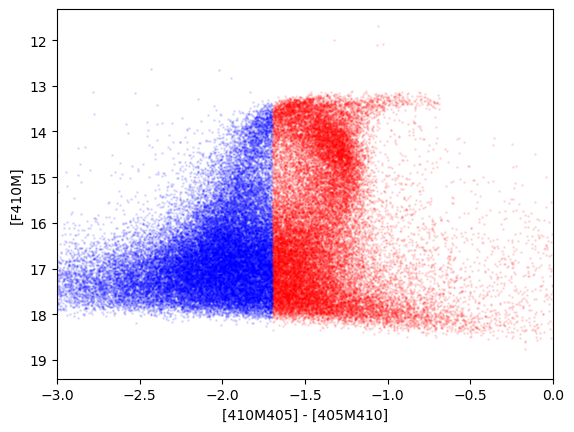

In [83]:
ax = plt.subplot(111)
cat_above.plot_CMD('410m405', '405m410', 'f410m', color='r', s=1, ax=ax, alpha=0.1)
cat_below.plot_CMD('410m405', '405m410', 'f410m', color='b', s=1, ax=ax, alpha=0.1)
plt.gca().invert_yaxis()
ax.set_xlim(-3, 0)

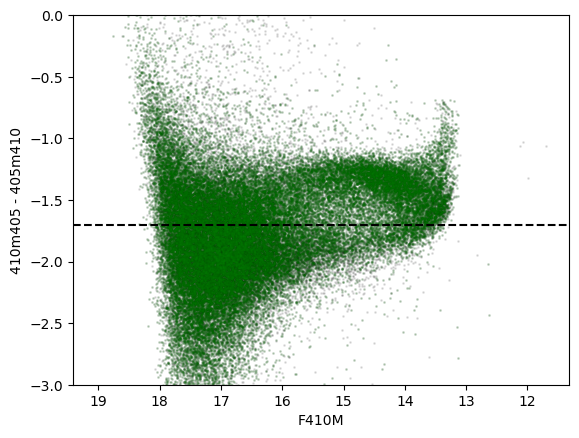

In [78]:
#cat_use.plot_CMD('182m187', '187m182', 'f182m', color='k', s=1, alpha=0.1)
plt.scatter(cat_use.band('f410m'), cat_use.color('410m405', '405m410'), s=1, alpha=0.1, color='k')
plt.scatter(cat_red.band('f410m'), cat_red.color('410m405', '405m410'), s=1, alpha=0.1, color='g')
plt.xlabel('F410M')
plt.ylabel('410m405 - 405m410')
plt.gca().invert_xaxis()
plt.ylim(-3, 0)
plt.axhline(-1.7, color='k', ls='--')

(-3.0, 0.0)

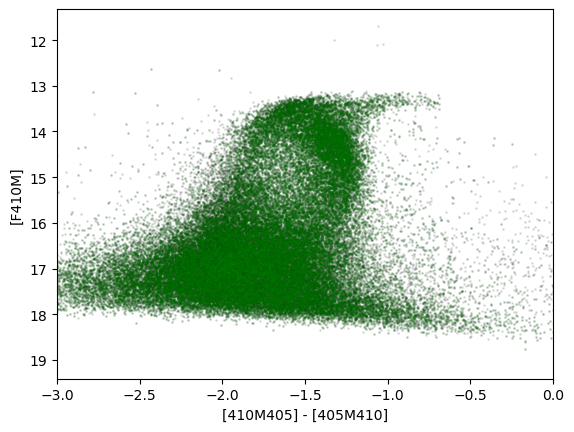

In [84]:
ax = plt.subplot(111)
cat_use.plot_CMD('410m405', '405m410', 'f410m', color='k', s=1, ax=ax, alpha=0.1)
cat_red.plot_CMD('410m405', '405m410', 'f410m', color='g', s=1, ax=ax, alpha=0.1)
plt.gca().invert_yaxis()
ax.set_xlim(-3, 0)

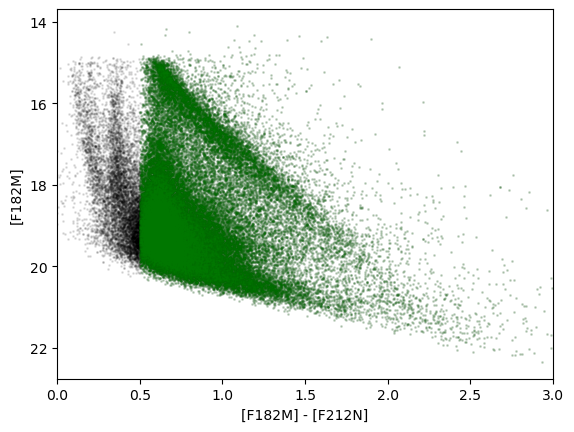

In [ ]:
ax=plt.subplot(111)
cat_use.plot_CMD('f182m', 'f212n', 'f182m', color='k', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

#ax = plt.subplot(122)
cat_red.plot_CMD('f182m', 'f212n', 'f182m', color='g', s=1, ax=ax, alpha=0.1, label='color cut')
ax.set_xlim(0, 3)

plt.gca().invert_yaxis()

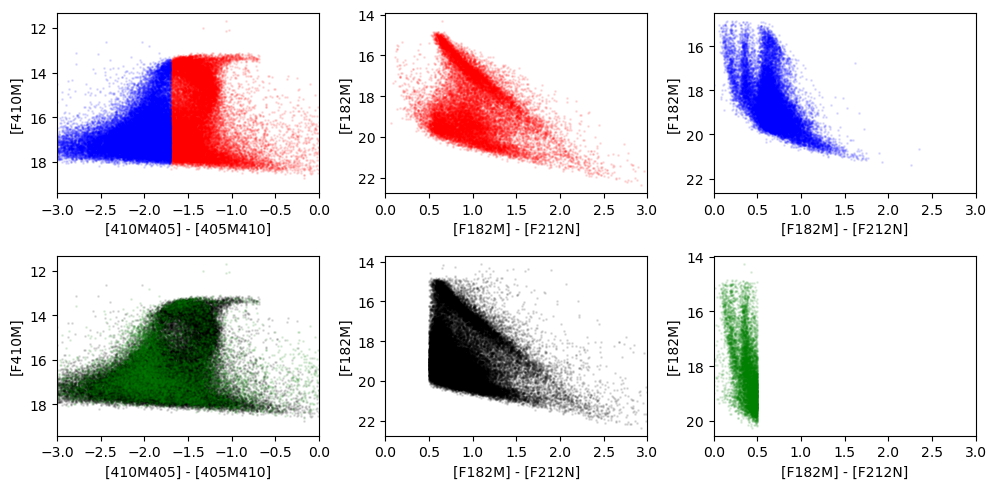

In [98]:
fig = plt.figure(figsize=(10, 5))

ax=plt.subplot(231)
cat_above.plot_CMD('410m405', '405m410', 'f410m', color='r', s=1, ax=ax, alpha=0.1)
cat_below.plot_CMD('410m405', '405m410', 'f410m', color='b', s=1, ax=ax, alpha=0.1)
plt.gca().invert_yaxis()
ax.set_xlim(-3, 0)

ax=plt.subplot(232)
cat_above.plot_CMD('f182m', 'f212n', 'f182m', color='r', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

ax = plt.subplot(233)
cat_below.plot_CMD('f182m', 'f212n', 'f182m', color='b', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

ax = plt.subplot(234)
cat_red.plot_CMD('410m405', '405m410', 'f410m', color='k', s=1, ax=ax, alpha=0.1)
cat_blue.plot_CMD('410m405', '405m410', 'f410m', color='g', s=1, ax=ax, alpha=0.1)
plt.gca().invert_yaxis()
ax.set_xlim(-3, 0)

ax=plt.subplot(235)
cat_red.plot_CMD('f182m', 'f212n', 'f182m', color='k', s=1, ax=ax, alpha=0.1)
ax.set_xlim(0, 3)

ax = plt.subplot(236)
cat_blue.plot_CMD('f182m', 'f212n', 'f182m', color='g', s=1, ax=ax, alpha=0.1, label='color cut')
ax.set_xlim(0, 3)

plt.tight_layout()

In [45]:
#basetable = Table.read(f'{basepath}/catalogs/basic_merged_photometry_tables_merged_bgsub_blur.fits')
basetable = cat_use.catalog#Table.read(f'{basepath}/catalogs/basic_merged_indivexp_photometry_tables_merged.fits')
#fits.open(f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits')

In [46]:
#mas_405 = np.logical_or(np.array(basetable['qfit_f405n'])<0.4, np.isnan(np.array(basetable['mag_ab_f405n'])))
#mas_410 = np.logical_or(np.array(basetable['qfit_f410m'])<0.4, np.isnan(np.array(basetable['mag_ab_f410m'])))
#mask = np.logical_and(mas_405, mas_410)
#mas_466 = np.logical_or(np.array(basetable['qfit_f466n'])<0.4, np.isnan(np.array(basetable['mag_ab_f466n'])))
#mask = np.logical_and(mask, mas_466)
#mas_187 = np.logical_or(np.array(basetable['qfit_f187n'])<0.4, np.isnan(np.array(basetable['mag_ab_f187n'])))
#mask = np.logical_and(mask, mas_187)
#mas_182 = np.logical_or(np.array(basetable['qfit_f182m'])<0.4, np.isnan(np.array(basetable['mag_ab_f182m'])))
#mask = np.logical_and(mask, mas_182)
#mas_212 = np.logical_or(np.array(basetable['qfit_f212n'])<0.4, np.isnan(np.array(basetable['mag_ab_f212n'])))
#mask = np.logical_and(mask, mas_212)
#
#mask_num = np.array([basetable[colname] < 0.1 for colname in basetable.colnames if colname.startswith('emag')]).max(axis=0)
#
#mask = np.logical_and(mask, mask_num)

In [47]:
tbl_use = basetable#[mask]
crds_use = tbl_use['skycoord_ref']

In [48]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [49]:
#filament_reg = Regions.read(f'/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
#regions.Regions.read(f'{basepath}/regions_/filament_short.reg')

pos = SkyCoord('17:46:20.8194569665', '-28:37:52.4236707380', unit=(u.hourangle, u.deg), frame='icrs')
size_filabox = (2.6762805138*u.arcmin, 86.6778672344*u.arcsec)
reg_filabox = regions.RectangleSkyRegion(center=pos, width=size_filabox[1], height=size_filabox[0])

#tbl_in = tbl_use[filament_reg[0].contains(crds_use, wcs=ww)]
#crds_in = crds_use[filament_reg[0].contains(crds_use, wcs=ww)]
#tbl_in_use = JWSTCatalog(tbl_in)

tbl_in = tbl_use[reg_filabox.contains(crds_use, wcs=ww)]
crds_in = crds_use[reg_filabox.contains(crds_use, wcs=ww)]
tbl_in_use = JWSTCatalog(tbl_in)

(0.0, 3.0)

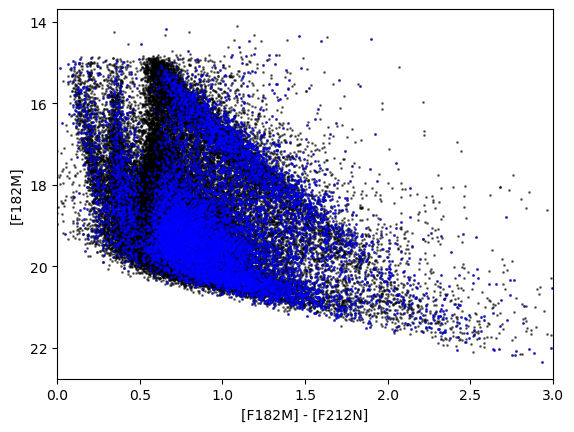

In [53]:
ax = plt.subplot(111)
cat_use.plot_CMD('f182m', 'f212n', 'f182m', color='k', s=1, ax=ax, alpha=0.5)
tbl_in_use.plot_CMD('f182m', 'f212n', 'f182m', color='b', s=1, ax=ax, alpha=0.5)
plt.gca().invert_yaxis()
ax.set_xlim(0, 3)

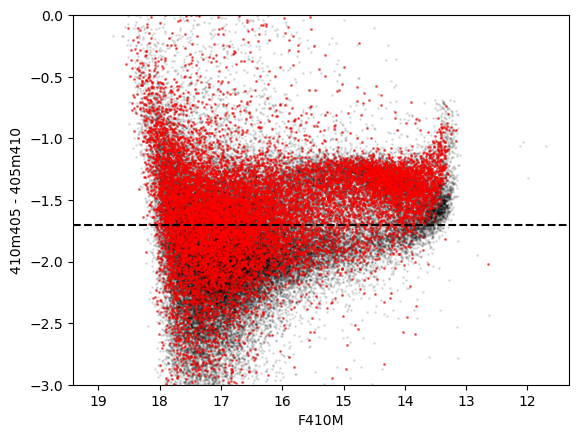

In [55]:
#cat_use.plot_CMD('182m187', '187m182', 'f182m', color='k', s=1, alpha=0.1)
plt.scatter(cat_use.band('f410m'), cat_use.color('410m405', '405m410'), s=1, alpha=0.1, color='k')
plt.scatter(tbl_in_use.band('f410m'), tbl_in_use.color('410m405', '405m410'), s=1, alpha=0.5, color='r')
plt.xlabel('F410M')
plt.ylabel('410m405 - 405m410')
plt.gca().invert_xaxis()
plt.ylim(-3, 0)
plt.axhline(-1.7, color='k', ls='--')

(18.0, 14.5)

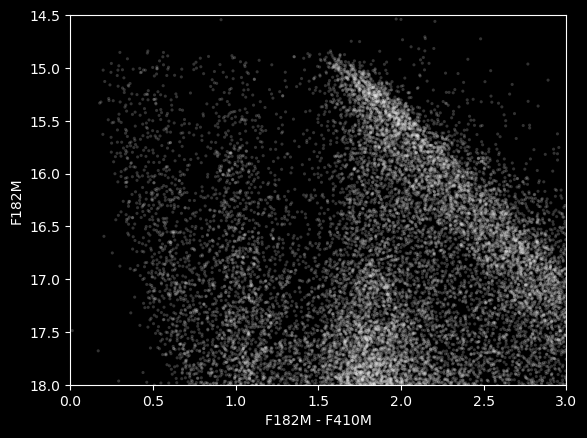

In [21]:
plt.style.use('dark_background')

ax = plt.subplot(111)

cat_use.plot_CMD('f182m', 'f410m', 'f182m', facecolor='white', edgecolor='none', alpha=0.2, s=5, ax=ax)
#tbl_in_use.plot_CMD('f182m', 'f410m', 'f182m', color='r', alpha=0.5, s=1, ax=ax)

#plt.gca().invert_yaxis()
ax.set_xlim(0, 3)
ax.set_ylim(18, 14.5)

(0.0, 9.0)

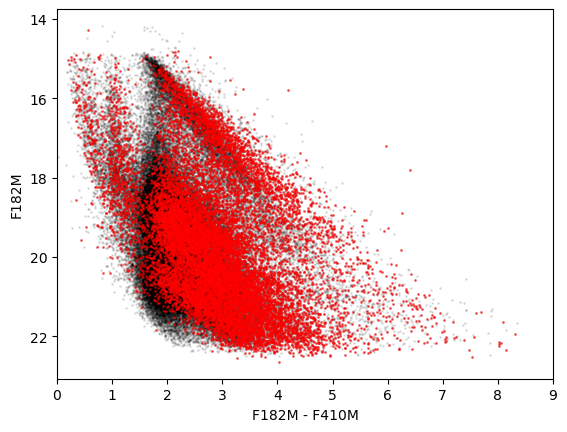

In [ ]:
ax = plt.subplot(111)

cat_use.plot_CMD('f182m', 'f410m', 'f182m', color='k', alpha=0.1, s=1, ax=ax)
tbl_in_use.plot_CMD('f182m', 'f410m', 'f182m', color='r', alpha=0.5, s=1, ax=ax)

plt.gca().invert_yaxis()
ax.set_xlim(0, 9)

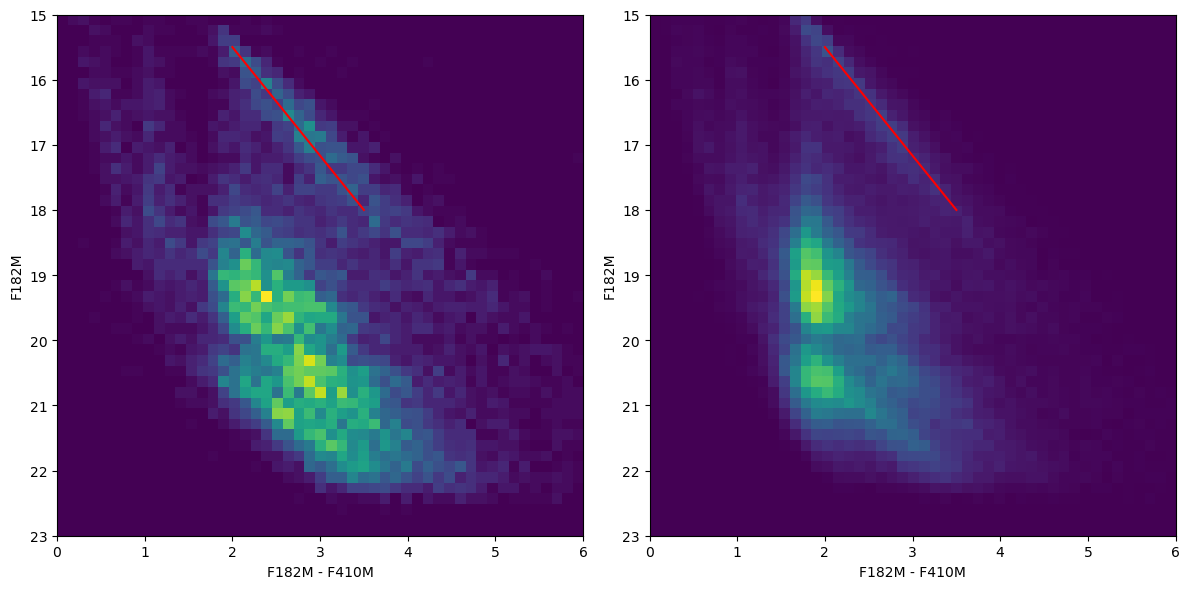

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

bins_x = np.linspace(0, 6, 50)
bins_y = np.linspace(15, 23, 50)

h_cloud, _, __ = np.histogram2d(tbl_in_use.color('F182M','F410M'), tbl_in_use.band('F182M'), bins=(bins_x, bins_y))
h_clear, _, __ = np.histogram2d(cat_use.color('F182M','F410M'), cat_use.band('F182M'), bins=(bins_x, bins_y))

h_cloud = h_cloud.swapaxes(0, 1)
h_clear = h_clear.swapaxes(0, 1)

h_cloud = np.flipud(h_cloud)
h_clear = np.flipud(h_clear)

ax1.imshow(h_cloud, origin='lower', aspect='auto', cmap='viridis', extent=(0, 6, 23, 15), vmin=0, vmax=np.max(h_cloud))
ax1.plot([2, 3.5], [15.5, 18], color='red')
ax1.set_xlabel('F182M - F410M')
ax1.set_ylabel('F182M')

ax2.imshow(h_clear, origin='lower', aspect='auto', cmap='viridis', extent=(0, 6, 23, 15), vmin=0, vmax=np.max(h_clear))
ax2.plot([2, 3.5], [15.5, 18], color='red')
ax2.set_xlabel('F182M - F410M')
ax2.set_ylabel('F182M')

plt.tight_layout()
plt.show()

In [14]:
reg_pixel_area = reg_filabox.to_pixel(ww).area*u.pixel**2* ww.proj_plane_pixel_area().to(u.arcsec**2)/(u.pixel**2)
reg_pixel_area

<Quantity 13918.47256983 arcsec2>

In [16]:
data_405 = fits.getdata(fn_405)
image_area = data_405.size * ww.proj_plane_pixel_area().to(u.arcsec**2)
image_area

<Quantity 105475.56675135 arcsec2>

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0, 0.5, 'F182M')

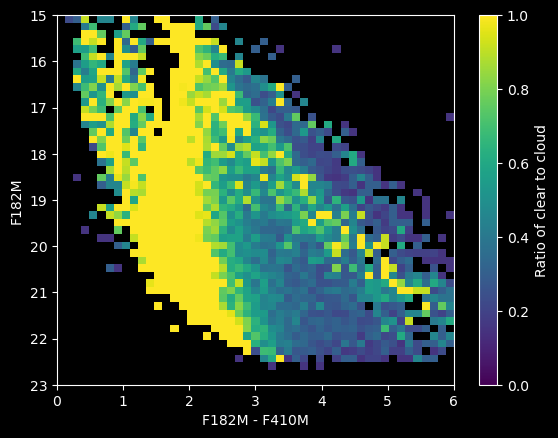

In [20]:
plt.style.use('dark_background')

ratio = h_clear / (h_cloud/(reg_pixel_area/(image_area-reg_pixel_area)))

ax = plt.subplot(111)
im = ax.imshow(ratio, origin='lower', aspect='auto', cmap='viridis', extent=(0, 6, 23, 15), vmin=0, vmax=1)
plt.colorbar(im, ax=ax, label='Ratio of clear to cloud')
ax.set_xlabel('F182M - F410M')
ax.set_ylabel('F182M')

Text(0, 0.5, 'F182M')

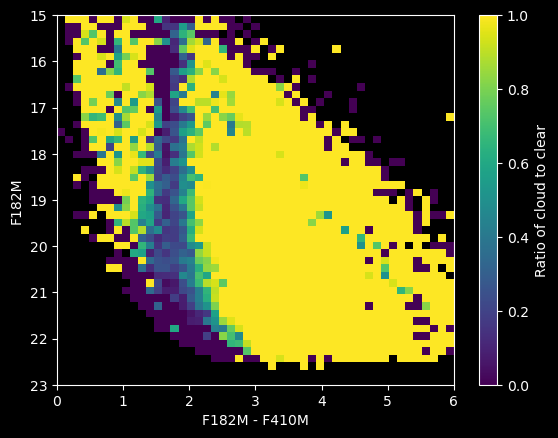

In [19]:
ratio = h_cloud / (h_clear/((image_area-reg_pixel_area)/reg_pixel_area))

ax = plt.subplot(111)
im = ax.imshow(ratio, origin='lower', aspect='auto', cmap='viridis', extent=(0, 6, 23, 15), vmin=0, vmax=1)
plt.colorbar(im, ax=ax, label='Ratio of cloud to clear')
ax.set_xlabel('F182M - F410M')
ax.set_ylabel('F182M')

In [13]:
color_182_212 = tbl_use['mag_ab_f182m'] - tbl_use['mag_ab_f212n']
color_405_410 = tbl_use['mag_ab_f405n'] - tbl_use['mag_ab_f410m']
color_187_182 = tbl_use['mag_ab_f187n'] - tbl_use['mag_ab_f182m']
mag_187 = tbl_use['mag_ab_f187n']
mag_182 = tbl_use['mag_ab_f182m']
mag_212 = tbl_use['mag_ab_f212n']
mag_410 = tbl_use['mag_ab_f410m']
mag_405 = tbl_use['mag_ab_f405n']
mag_466 = tbl_use['mag_ab_f466n']

color_in_182_212 = tbl_in['mag_ab_f182m'] - tbl_in['mag_ab_f212n']
color_in_405_410 = tbl_in['mag_ab_f405n'] - tbl_in['mag_ab_f410m']
color_in_187_182 = tbl_in['mag_ab_f187n'] - tbl_in['mag_ab_f182m']
mag_in_187 = tbl_in['mag_ab_f187n']
mag_in_182 = tbl_in['mag_ab_f182m']
mag_in_410 = tbl_in['mag_ab_f410m']
mag_in_405 = tbl_in['mag_ab_f405n']

Text(0.5, 1.0, 'With qfit < 0.4')

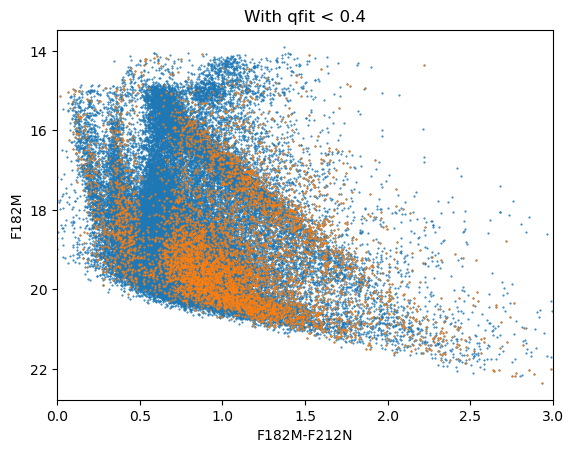

In [14]:
ax = plt.subplot(111)
ax.scatter(color_182_212, mag_182, s=1, marker='.')
ax.scatter(color_in_182_212, mag_in_182, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M-F212N')
ax.set_ylabel('F182M')
plt.xlim(left=0, right=3)
plt.title('With qfit < 0.4')

Text(0, 0.5, 'F410M')

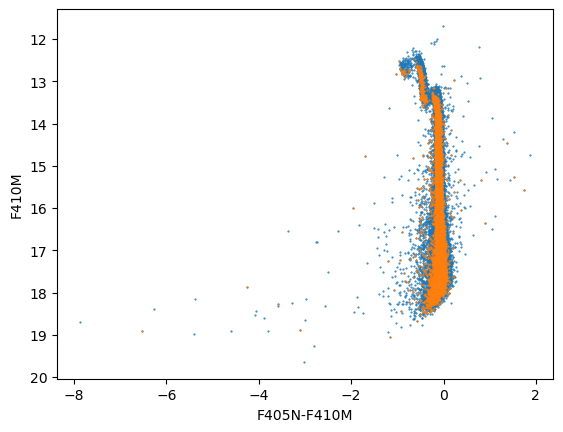

In [15]:
ax = plt.subplot(111)
ax.scatter(color_405_410, mag_410, s=1, marker='.')
ax.scatter(color_in_405_410, mag_in_410, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F410M')
#plt.xlim(left=-5, right=1)

Text(0, 0.5, 'F410M')

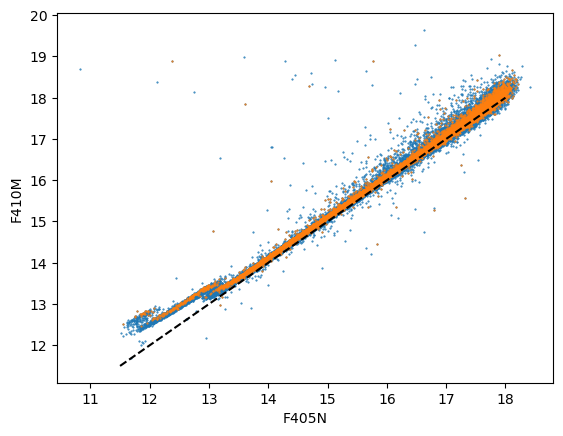

In [16]:
ax = plt.subplot(111)
ax.scatter(mag_405, mag_410, s=1, marker='.')
ax.scatter(mag_in_405, mag_in_410, s=1, marker='.')
ax.plot([11.5, 18], [11.5, 18], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N')
ax.set_ylabel('F410M')
#plt.xlim(left=-5, right=1)


Text(0, 0.5, 'F182M')

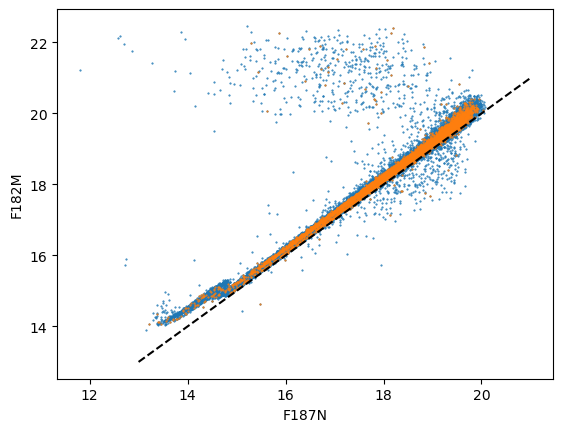

In [17]:
ax = plt.subplot(111)
ax.scatter(mag_187, mag_182, s=1, marker='.')
ax.scatter(mag_in_187, mag_in_182, s=1, marker='.')
ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F187N')
ax.set_ylabel('F182M')
#plt.xlim(left=-5, right=1)


(-2.0, 0.0)

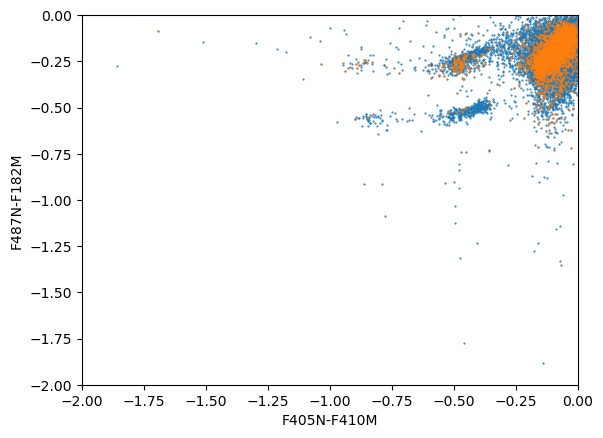

In [18]:
ax = plt.subplot(111)
ax.scatter(color_405_410, color_187_182, s=1, marker='.')
ax.scatter(color_in_405_410, color_in_187_182, s=1, marker='.')
#ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F487N-F182M')
plt.xlim(left=-2, right=0)
plt.ylim(bottom=-2, top=0)